Predicting whether a person has diabetis or not 

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
import math
import io
from google.colab import data_table
data_table.enable_dataframe_formatter()


from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [87]:
from google.colab import files

uploaded = files.upload()

df = pd.read_csv(io.BytesIO(uploaded['diabetes.csv']))
data = pd.read_csv(io.BytesIO(uploaded['diabetes.csv']))
print(df.head())

Saving diabetes.csv to diabetes (2).csv
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


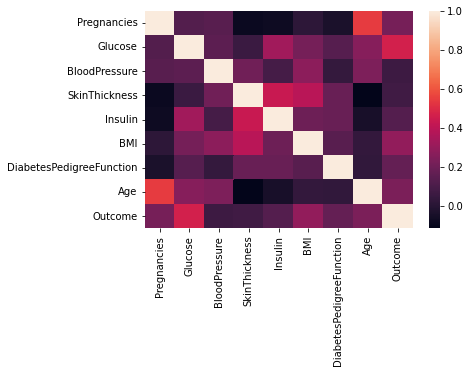

In [88]:
sns.heatmap(df.corr())

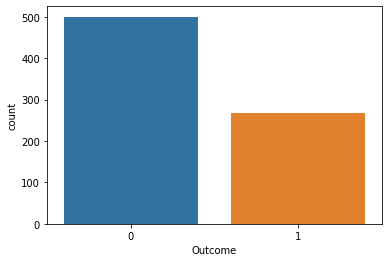

In [89]:
sns.countplot(x = 'Outcome', data = df)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [91]:
df.isnull().sum()         # perfect datset I have ever seen :)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

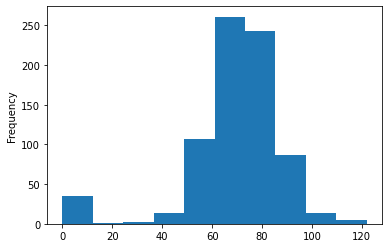

In [92]:
df['BloodPressure'].plot.hist()

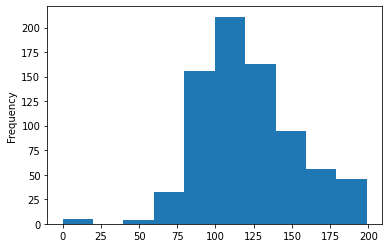

In [93]:
df['Glucose'].plot.hist()

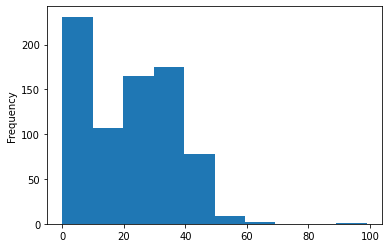

In [94]:
df['SkinThickness'].plot.hist()

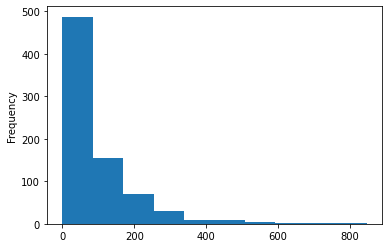

In [95]:
df['Insulin'].plot.hist()

Values like columns Glucose, Blood Pressure, Skin Thickness, BMI, Insulin can not be accepted as zero because it effects the accuracy, we can replace such values with mean of that column 

In [96]:
zero_not_accepted = ['Glucose', 'SkinThickness', 'BloodPressure', 'BMI', 'Insulin']

# here BMI is not int but we are going with lets change it and also check the accuracy if so thats the case accuracy is 76.1
for column in zero_not_accepted :
  df[column] = df[column].replace(0, np.NaN)
  mean = int(df[column].mean(skipna = True))
  df[column] = df[column].replace(np.NaN, mean)

In [99]:
X = df.iloc[:, 0:8].values 
Y = df.iloc[:,8].values 
#print(Y)

In [100]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [101]:
#feature scaling 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [102]:
math.sqrt(len(Y_test))      # as this is 12 our K should not be even so took 11 what if we take 13 did not change much it got decreased by 0.002

12.409673645990857

In [103]:
knnmodel = KNeighborsClassifier()      # we did not give value of K over here lets give it

classifier = KNeighborsClassifier(n_neighbors = 11, p = 2, metric = 'euclidean')

In [104]:
knnmodel.fit(X_train, Y_train)
classifier.fit(X_train, Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [105]:
predictions = knnmodel.predict(X_test)

prediction = classifier.predict(X_test)

In [106]:
classification_report(Y_test,predictions) 


'              precision    recall  f1-score   support\n\n           0       0.84      0.81      0.82       107\n           1       0.60      0.64      0.62        47\n\n    accuracy                           0.76       154\n   macro avg       0.72      0.73      0.72       154\nweighted avg       0.76      0.76      0.76       154\n'

In [107]:
f1_score(Y_test,predictions, average = 'weighted')

0.7617476089162217

In [108]:
classification_report(Y_test, prediction)

'              precision    recall  f1-score   support\n\n           0       0.86      0.88      0.87       107\n           1       0.71      0.68      0.70        47\n\n    accuracy                           0.82       154\n   macro avg       0.79      0.78      0.78       154\nweighted avg       0.82      0.82      0.82       154\n'

In [109]:
f1_score(Y_test, prediction, average = 'weighted')

0.8170472844385889

Now lets keep BMI as float itself while replacing with the mean 

In [110]:
# So BMI remaining as float yielded very less accuracy
zero_not_accepted_2 = ['Glucose', 'SkinThickness', 'BloodPressure', 'Insulin']

# here BMI is not int but we are going with lets change it and also check the accuracy if so thats the case accuracy is 76.1
for column in zero_not_accepted_2 :
  data[column] = data[column].replace(0, np.NaN)
  mean = int(data[column].mean(skipna = True))
  data[column] = data[column].replace(np.NaN, mean)

data['BMI'] = data['BMI'].replace(0, np.NaN)
mean_BMI = data['BMI'].mean(skipna = True)
data['BMI'] = data['BMI'].replace(np.NaN, mean_BMI)

In [111]:
x = data.iloc[:, 0:8].values
y = data.iloc[:,8].values

In [112]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [113]:
knnmodel_2 = KNeighborsClassifier(n_neighbors = 11, p = 2, metric = 'euclidean')

In [114]:
knnmodel_2.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [115]:
predictions_2 = knnmodel.predict(x_test)

In [116]:
classification_report(y_test,predictions_2) 

'              precision    recall  f1-score   support\n\n           0       0.67      0.80      0.73       107\n           1       0.16      0.09      0.11        47\n\n    accuracy                           0.58       154\n   macro avg       0.41      0.44      0.42       154\nweighted avg       0.51      0.58      0.54       154\n'

In [117]:
f1_score(y_test, predictions_2, average = 'weighted')

0.540293980971947